In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

plotpars_hmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (10.,8.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_cmp = {'axes.labelsize': 22,
                'axes.linewidth': 1.,
                'figure.figsize': (12.,12.),
                'font.size': 24,
                'legend.frameon': True,
                'legend.framealpha': 0.85,
                'legend.edgecolor': 'black',
                'legend.loc': 'best',
                'legend.fontsize': 15,
                'mathtext.fontset': 'stixsans',
                'savefig.bbox': 'tight',
                'xtick.labelsize': 22,
                'ytick.labelsize': 22,
               }

plotpars_2cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (15, 5.),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3rows = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (6, 9),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 12,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import matplotlib        as mt
import os
from matplotlib.gridspec import GridSpec

In [3]:
my_data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')
uvup = my_data[my_data['UV_CLASS_YI2011']=='UV_UPTURN']
uvwk = my_data[my_data['UV_CLASS_YI2011']=='UV_WEAK']

In [4]:
results_path = '../../LargeFilesResults/ThesisFigs/'

In [5]:
palette = ['#dfc27d', '#a6611a']

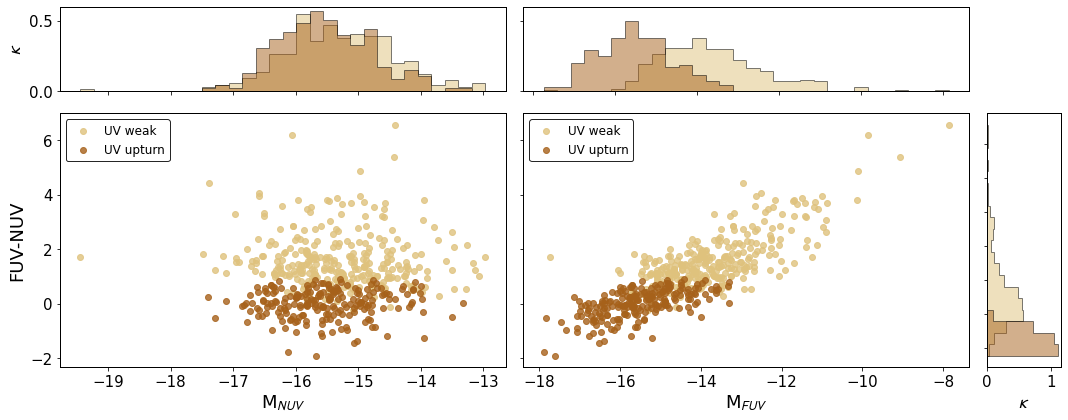

In [6]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel("FUV-NUV")

ax1_margx.set_ylabel(r"$\kappa$")

# PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_FUV']-uvwk['MAG_AB_NUV'], color=palette[0], alpha=0.5, bins=20, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_FUV']-uvup['MAG_AB_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uv_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uv_color_mags.pdf'))
plt.show()

In [7]:
plt.clf()

<Figure size 1080x360 with 0 Axes>

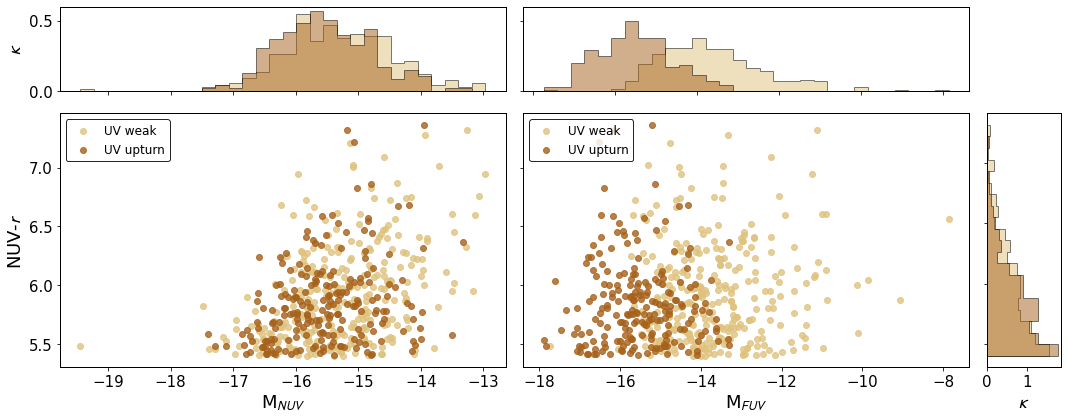

In [8]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel(r"NUV-$r$")

ax1_margx.set_ylabel(r"$\kappa$")

# # PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_NUV']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=20, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_NUV']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uvopt01_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uvopt01_color_mags.pdf'))
plt.show()

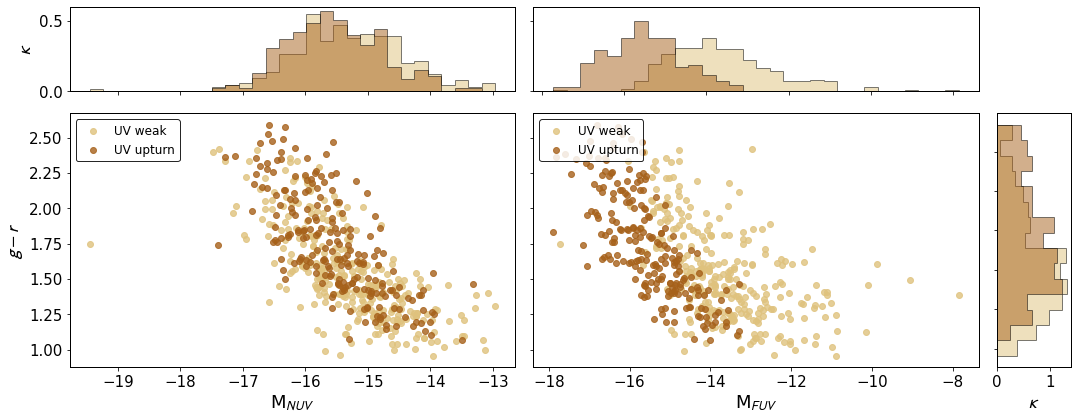

In [9]:
plt.rcParams.update(plotpars_2cols)

fig = plt.figure(figsize=(15, 6))
gs  = GridSpec(2, 3, height_ratios=[1., 3.], width_ratios=[3., 3., .5])

# PLOT 01 ========================================================================================================
ax1_joint = fig.add_subplot(gs[1,0])
ax1_margx = fig.add_subplot(gs[0,0])
# ax1_margy = fig.add_subplot(gs[1,1])

ax1_joint.scatter(uvwk['MAG_ABSOLUTE_NUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax1_joint.scatter(uvup['MAG_ABSOLUTE_NUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l1 = ax1_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l1.get_frame().set_edgecolor('black')


n, bins, patches = ax1_margx.hist(uvwk['MAG_ABSOLUTE_NUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax1_margx.hist(uvup['MAG_ABSOLUTE_NUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax1_margx.get_xticklabels(), visible=False)
ax1_margx.axes.set_ylim([0, 0.6])


ax1_joint.set_xlabel("M$_{NUV}$")
ax1_joint.set_ylabel(r"$g-r$")

ax1_margx.set_ylabel(r"$\kappa$")

# # PLOT 02 ========================================================================================================
ax2_joint = fig.add_subplot(gs[1,1])
ax2_margx = fig.add_subplot(gs[0,1])
ax2_margy = fig.add_subplot(gs[1,2])

ax2_joint.scatter(uvwk['MAG_ABSOLUTE_FUV'], uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], c=palette[0], alpha=0.8, 
                 label='UV weak')
ax2_joint.scatter(uvup['MAG_ABSOLUTE_FUV'], uvup['MAG_AB_G']-uvup['MAG_AB_R'], c=palette[1], alpha=0.8, 
                 label='UV upturn')
l2 = ax2_joint.legend(loc='upper left', numpoints=1, frameon=True, framealpha=0.85)
l2.get_frame().set_edgecolor('black')
plt.setp(ax2_joint.get_yticklabels(), visible=False)


n, bins, patches = ax2_margx.hist(uvwk['MAG_ABSOLUTE_FUV'], color=palette[0], alpha=0.5, bins=30, 
                                  edgecolor='black', density=True, histtype='stepfilled')
n, bins, patches = ax2_margx.hist(uvup['MAG_ABSOLUTE_FUV'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, histtype='stepfilled')
plt.setp(ax2_margx.get_xticklabels(), visible=False)
ax2_margx.axes.set_ylim([0, 0.6])
plt.setp(ax2_margx.get_yticklabels(), visible=False)


n, bins, patches = ax2_margy.hist(uvwk['MAG_AB_G']-uvwk['MAG_AB_R'], color=palette[0], alpha=0.5, bins=15, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
n, bins, patches = ax2_margy.hist(uvup['MAG_AB_G']-uvup['MAG_AB_R'], color=palette[1], alpha=0.5, bins=bins, 
                                  edgecolor='black', density=True, orientation='horizontal', histtype='stepfilled')
plt.setp(ax2_margy.get_yticklabels(), visible=False)

ax2_joint.set_xlabel("M$_{FUV}$")
ax2_margy.set_xlabel(r"$\kappa$")

plt.tight_layout()

plt.savefig(os.path.join(results_path, 'uvopt02_color_mags.png'))
plt.savefig(os.path.join(results_path, 'uvopt02_color_mags.pdf'))
plt.show()